In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Phone_Data2.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phone_brand         1708 non-null   object 
 1   phone_model         1708 non-null   object 
 2   store               1708 non-null   object 
 3   price_usd           1708 non-null   float64
 4   storage             1708 non-null   int64  
 5   ram                 1708 non-null   int64  
 6   launch_date         1708 non-null   object 
 7   dimensions          1708 non-null   object 
 8   weight              1708 non-null   float64
 9   display_type        1708 non-null   object 
 10  display_size        1708 non-null   float64
 11  display_resolution  1708 non-null   object 
 12  os                  1708 non-null   object 
 13  nfc                 1708 non-null   int64  
 14  usb                 1708 non-null   object 
 15  battery             1708 non-null   int64  
 16  featur

In [7]:
data.head()

,phone_brand,phone_model,store,price_usd,storage,ram,launch_date,dimensions,weight,display_type,...,price_range,os_type,os_version,battery_size,colors_available,chip_company,cpu_core,gpu_company,fingerprint,video_resolution
0,apple,Apple iPhone 16 Pro,Amazon DE,1357.55,256,8,2024/9/20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,medium price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
1,apple,Apple iPhone 16 Pro,Amazon DE,1492.55,512,8,2024/9/20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
2,apple,Apple iPhone 16 Pro,Amazon DE,1705.32,1000,8,2024/9/20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
3,apple,Apple iPhone 16 Pro Max,Amazon DE,1564.92,512,8,2024/9/20,163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in),227.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Large,4,Apple,Hexa-core,Apple,Face,4K
4,apple,Apple iPhone 12 mini,Amazon DE,247.32,128,4,2020/11/13,131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in),135.0,"Super Retina XDR OLED, HDR10, Dolby Vision, 62...",...,medium price,iOS,14.1,Small,6,Apple,Hexa-core,Apple,Face,4K


## STEP 1 : Data Cleaning

In [9]:
data.isnull().sum()

phone_brand            0
phone_model            0
store                  0
price_usd              0
storage                0
ram                    0
launch_date            0
dimensions             0
weight                 0
display_type           0
display_size           0
display_resolution     0
os                     0
nfc                    0
usb                    0
battery                0
features_sensors       0
colors                 0
video                  0
chipset                0
cpu                    0
gpu                    0
year                   0
foldable               0
ppi_density            0
quantile_10            0
quantile_50            0
quantile_90            0
price_range            0
os_type                0
os_version             0
battery_size           0
colors_available       0
chip_company           0
cpu_core              18
gpu_company           71
fingerprint            0
video_resolution       0
dtype: int64

In [11]:
data.shape

(1708, 38)

In [13]:
# drop the row which contain missing values
df = data.dropna()

In [15]:
df.shape

(1628, 38)

In [17]:
# remove duplicates
df = df.drop_duplicates()

In [23]:
df.shape

(1628, 38)

In [25]:
# change data type of 'year' and 'foldable'
df['year'] = pd.to_datetime(df['year']) 
df['foldable'] = df['foldable'].astype(int)
df['launch_date'] = pd.to_datetime(df['launch_date'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1628 entries, 0 to 1707
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   phone_brand         1628 non-null   object        
 1   phone_model         1628 non-null   object        
 2   store               1628 non-null   object        
 3   price_usd           1628 non-null   float64       
 4   storage             1628 non-null   int64         
 5   ram                 1628 non-null   int64         
 6   launch_date         1628 non-null   datetime64[ns]
 7   dimensions          1628 non-null   object        
 8   weight              1628 non-null   float64       
 9   display_type        1628 non-null   object        
 10  display_size        1628 non-null   float64       
 11  display_resolution  1628 non-null   object        
 12  os                  1628 non-null   object        
 13  nfc                 1628 non-null   int64         
 1

In [29]:
df.columns

Index(['phone_brand', 'phone_model', 'store', 'price_usd', 'storage', 'ram',
       'launch_date', 'dimensions', 'weight', 'display_type', 'display_size',
       'display_resolution', 'os', 'nfc', 'usb', 'battery', 'features_sensors',
       'colors', 'video', 'chipset', 'cpu', 'gpu', 'year', 'foldable',
       'ppi_density', 'quantile_10', 'quantile_50', 'quantile_90',
       'price_range', 'os_type', 'os_version', 'battery_size',
       'colors_available', 'chip_company', 'cpu_core', 'gpu_company',
       'fingerprint', 'video_resolution'],
      dtype='object')

## STEP 2 : Data Visualisation

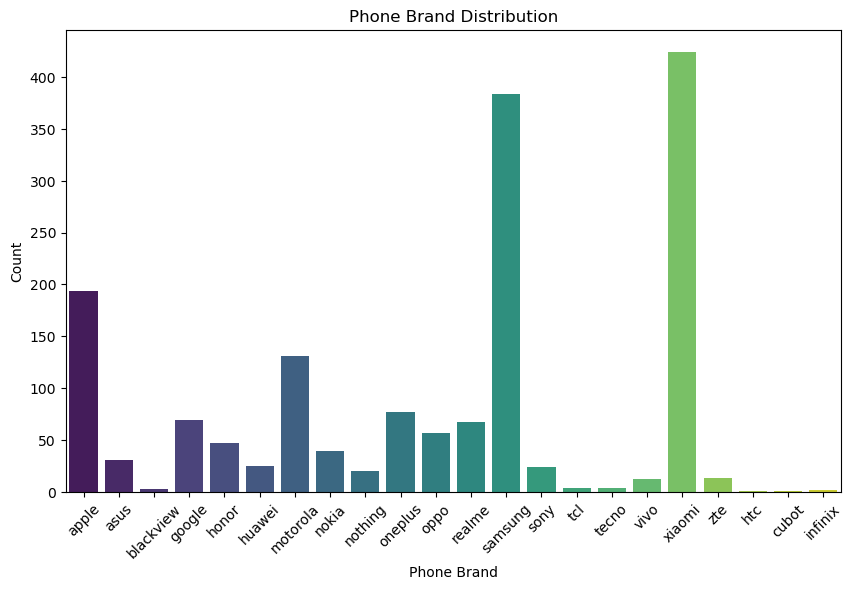

In [14]:
# Bar chart-count of phones available for each brand
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='phone_brand', palette='viridis')
plt.title('Phone Brand Distribution')
plt.xticks(rotation=45)
plt.xlabel('Phone Brand')
plt.ylabel('Count')
plt.show()

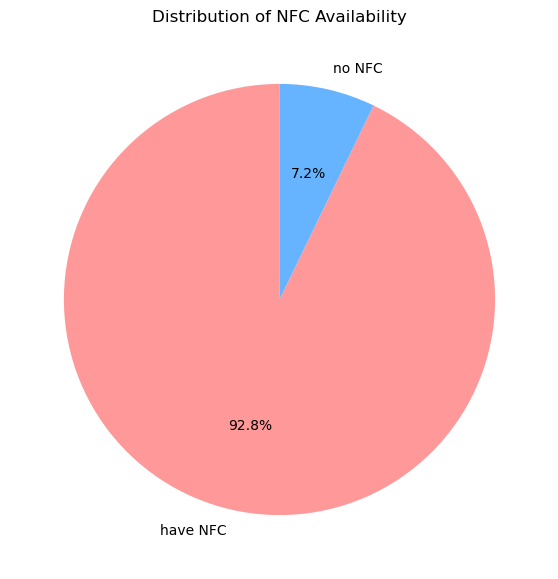

In [19]:
# Pie chart for 'nfc' column (True/False)
nfc_counts = df['nfc'].value_counts()
plt.figure(figsize=(7, 7))
nfc_counts.plot.pie(labels = ['have NFC', 'no NFC'],autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of NFC Availability')
plt.ylabel('')
plt.show()

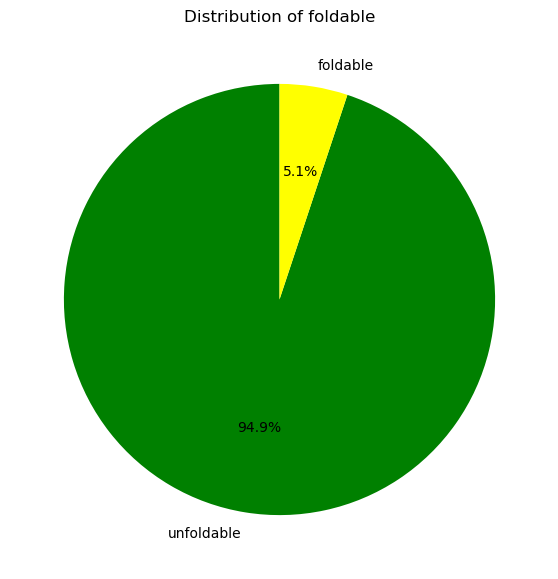

In [20]:
# Pie chart for 'foldable' column
foldable_counts = df['foldable'].value_counts()
plt.figure(figsize=(7, 7))
foldable_counts.plot.pie(labels = ['unfoldable', 'foldable'], autopct='%1.1f%%', startangle=90, colors=['green','yellow'])
plt.title('Distribution of foldable')
plt.ylabel('')
plt.show()

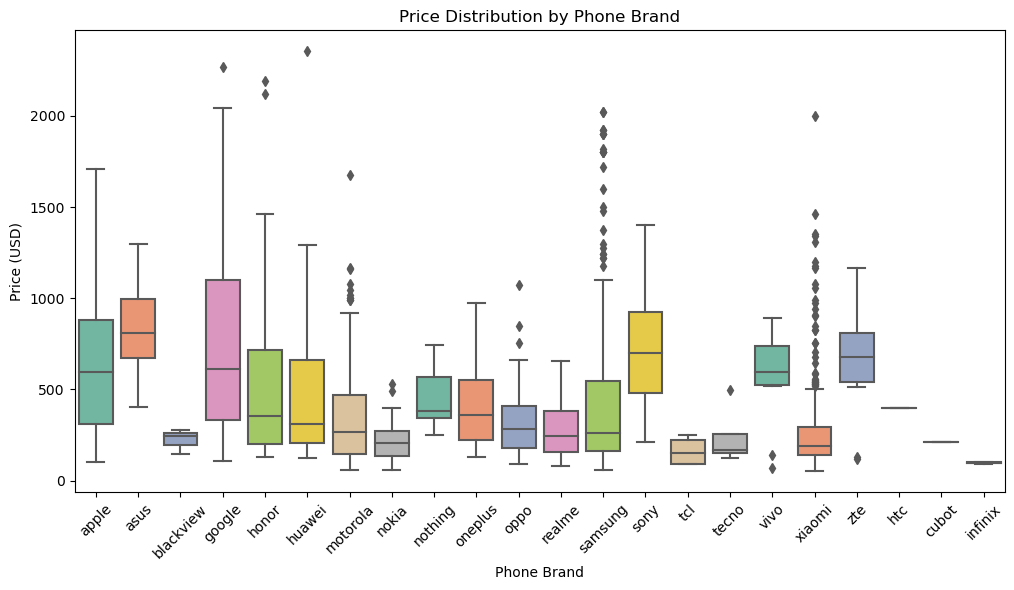

In [21]:
# The box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='phone_brand', y='price_usd', palette='Set2')
plt.title('Price Distribution by Phone Brand')
plt.xticks(rotation=45)
plt.xlabel('Phone Brand')
plt.ylabel('Price (USD)')
plt.show()

C:\Users\Abhishek Chaudhary\AppData\Local\Temp\ipykernel_8112\1258614337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='phone_brand', y='ram', palette='Set2')


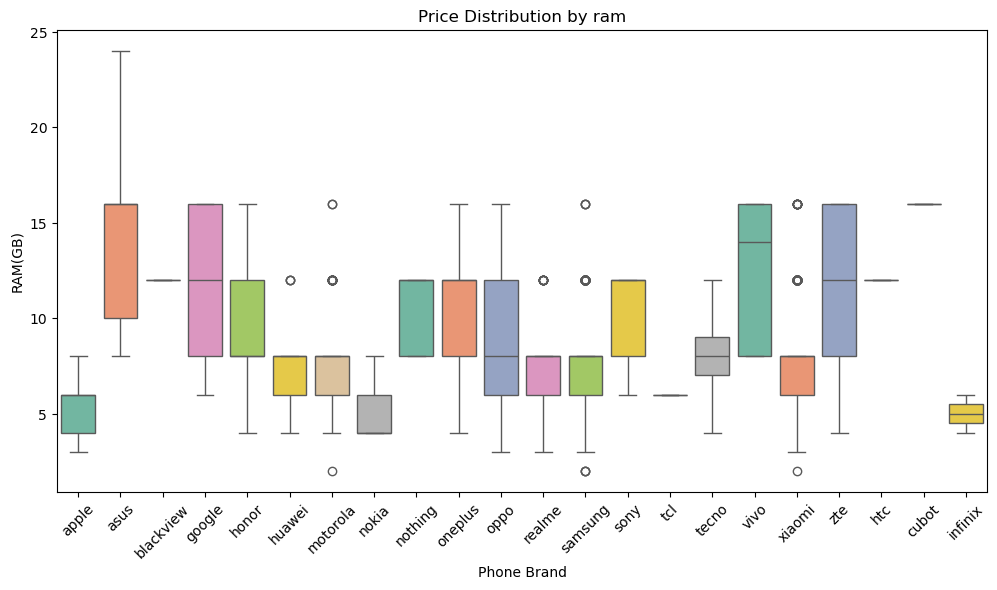

In [54]:
# The box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='phone_brand', y='ram', palette='Set2')
plt.title('Price Distribution by ram')
plt.xticks(rotation=45)
plt.xlabel('Phone Brand')
plt.ylabel('RAM(GB)')
plt.show()

In [30]:
df['phone_brand'].value_counts()

xiaomi       424
samsung      383
apple        194
motorola     131
oneplus       77
google        69
realme        67
oppo          57
honor         47
nokia         39
asus          31
huawei        25
sony          24
nothing       20
zte           13
vivo          12
tcl            4
tecno          4
blackview      3
infinix        2
htc            1
cubot          1
Name: phone_brand, dtype: int64

In [44]:
top3 = df[df['phone_brand'].isin(['apple', 'xiaomi', 'samsung'])]

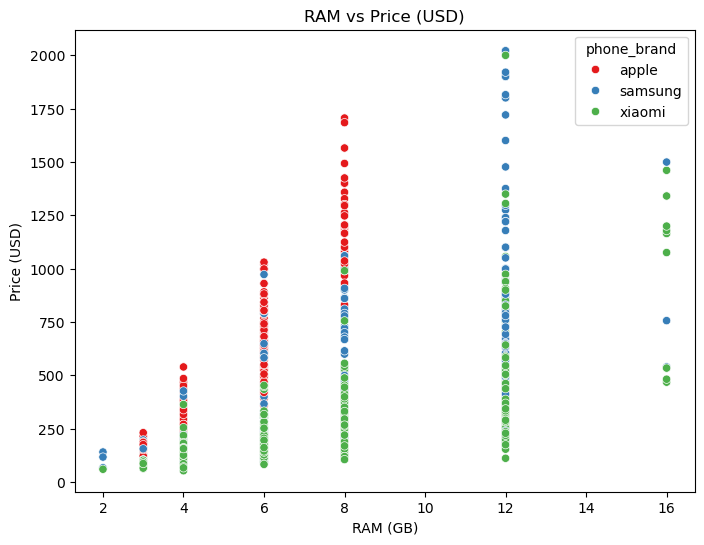

In [46]:
# The scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=top3, x='ram', y='price_usd', hue='phone_brand', palette='Set1')
plt.title('RAM vs Price (USD)')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (USD)')
plt.show()

In [48]:
top5 = df[df['phone_brand'].isin(['apple', 'xiaomi', 'samsung','motorola','nokia'])]

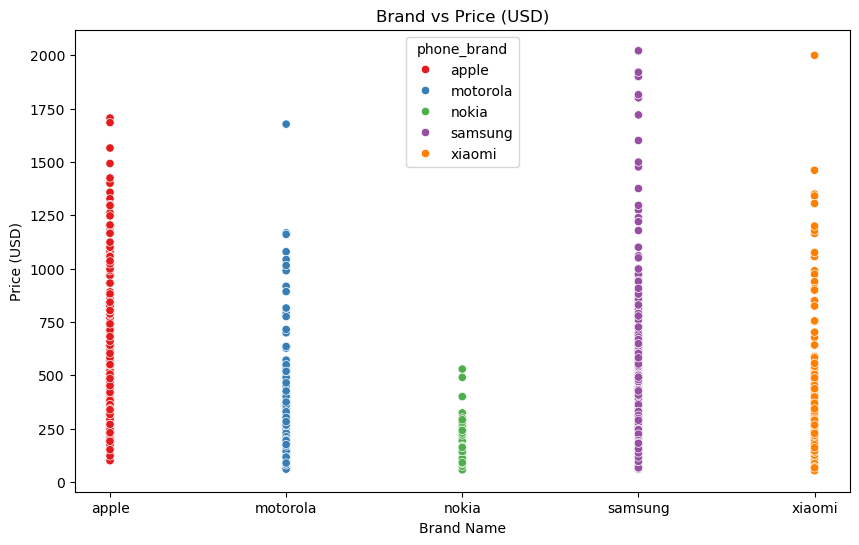

In [50]:
# The scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data= top5,x='phone_brand', y='price_usd', hue='phone_brand', palette='Set1')
plt.title('Brand vs Price (USD)')
plt.xlabel('Brand Name')
plt.ylabel('Price (USD)')
plt.show()

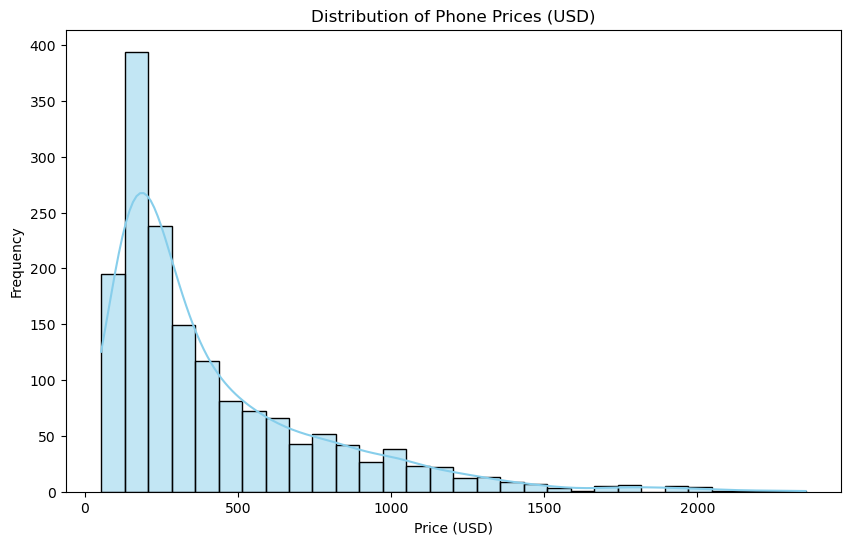

In [56]:
# the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price_usd'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Phone Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

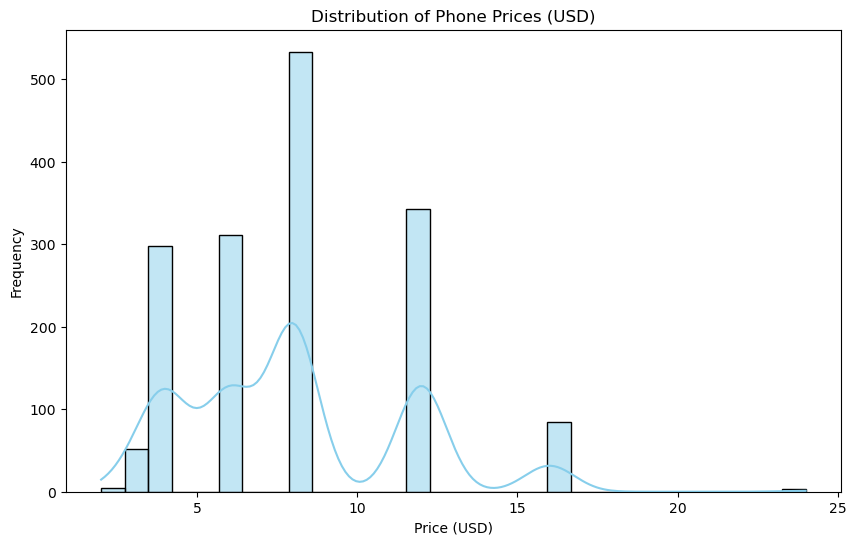

In [58]:
# the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['ram'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Phone Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

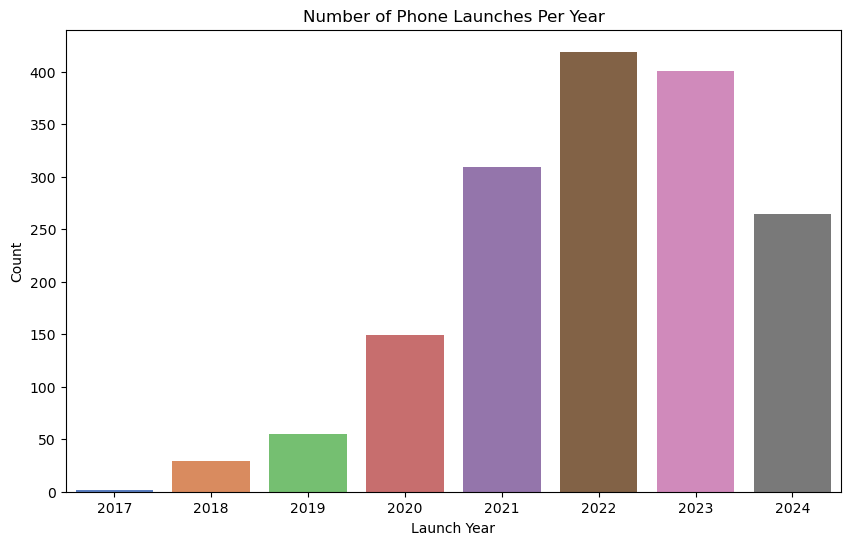

In [24]:
# Create a new column for the year of launch
df['launch_year'] = df['launch_date'].dt.year

# Plot number of phones launched per year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='launch_year', palette='muted')
plt.title('Number of Phone Launches Per Year')
plt.xlabel('Launch Year')
plt.ylabel('Count')
plt.show()

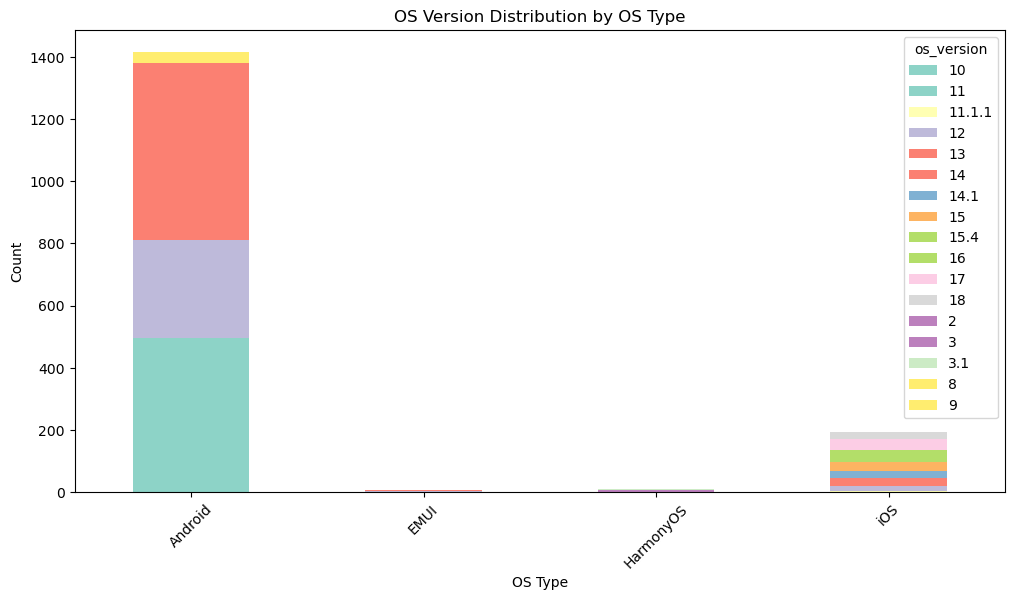

In [26]:
# Stacked bar plot showing OS version distribution by OS type
os_version_counts = df.groupby(['os_type', 'os_version']).size().unstack()
os_version_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('OS Version Distribution by OS Type')
plt.xlabel('OS Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Predictive

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1628 entries, 0 to 1707
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   phone_brand         1628 non-null   object        
 1   phone_model         1628 non-null   object        
 2   store               1628 non-null   object        
 3   price_usd           1628 non-null   float64       
 4   storage             1628 non-null   int64         
 5   ram                 1628 non-null   int64         
 6   launch_date         1628 non-null   datetime64[ns]
 7   dimensions          1628 non-null   object        
 8   weight              1628 non-null   float64       
 9   display_type        1628 non-null   object        
 10  display_size        1628 non-null   float64       
 11  display_resolution  1628 non-null   object        
 12  os                  1628 non-null   object        
 13  nfc                 1628 non-null   int64       

In [46]:
# Convert object data to numeric type.
encoder = LabelEncoder()
df['phone_brand'] = encoder.fit_transform(df['phone_brand'])
df['store'] = encoder.fit_transform(df['store'])
df['usb'] = encoder.fit_transform(df['usb'])
df['os_type'] = encoder.fit_transform(df['os_type'])
df['chip_company'] = encoder.fit_transform(df['chip_company'])
df['fingerprint'] = encoder.fit_transform(df['fingerprint'])
df['video_resolution'] = encoder.fit_transform(df['video_resolution'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1628 entries, 0 to 1707
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   phone_brand         1628 non-null   int32         
 1   phone_model         1628 non-null   object        
 2   store               1628 non-null   int32         
 3   price_usd           1628 non-null   float64       
 4   storage             1628 non-null   int64         
 5   ram                 1628 non-null   int64         
 6   launch_date         1628 non-null   datetime64[ns]
 7   dimensions          1628 non-null   object        
 8   weight              1628 non-null   float64       
 9   display_type        1628 non-null   object        
 10  display_size        1628 non-null   float64       
 11  display_resolution  1628 non-null   object        
 12  os                  1628 non-null   object        
 13  nfc                 1628 non-null   int64       

In [48]:
# Define the features and target variable
X = df[['phone_brand', 'store', 'storage', 'ram', 'weight', 'display_size', 'nfc'
       , 'usb', 'battery', 'foldable', 'ppi_density', 'quantile_10', 'quantile_50'
       , 'quantile_90', 'os_type', 'colors_available', 'chip_company', 'fingerprint', 'video_resolution']]  # Include other relevant features
y = df['price_usd']

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Make predictions
y_pred = model.predict(X_test)

In [52]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
print(mse)
print(r2)

43722.14101873158
0.732492419439718


In [54]:
print("Coefficients:", model.coef_)

Coefficients: [-9.00970854e+00  2.44425907e+01  2.86617483e-01  1.09943321e+01
 -1.93685040e-01  7.15659599e+01  7.06290768e+01  8.65717951e+00
  5.34851022e-02  2.99471375e+02  4.23859862e-01  2.31744158e+00
 -6.65683314e-01  3.81145590e-01  7.28651451e+01 -7.79148832e+00
  4.90032543e+00 -2.21176114e+01  1.18397964e+02]


In [55]:
X_with_const = sm.add_constant(X)
sm_model = sm.OLS(y, X_with_const).fit()

In [56]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:05:49   Log-Likelihood:                -10886.
No. Observations:                1628   AIC:                         2.181e+04
Df Residuals:                    1608   BIC:                         2.192e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1268.6884    149.758  